This is an Image classification exercise. We will play with an expired Kaggle competition, please follow the rule of Kaggle and check the following page for more information https://www.kaggle.com/c/dogs-vs-cats/. After you make the prediction on the testing data, submit your prediction to Kaggle via late submission portal and show your team performance (Name formation of your team: MSBA.SessionX.Yourname, please replace X and Yourname with the correct string) using the screenshot on the Private Leaderboard, along with the description of your solutions and the codes (ipynb formation is highly encouraged) as the final submission.

In [1]:
import numpy as np
import pandas as pd 
import os, shutil
import random

import keras
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

import cv2
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Using TensorFlow backend.


In [2]:
PATH = '../input/'
train_dir = '../input/train/'
test_dir = '../input/test/'

## Prepare data

In [112]:
train_images = []
train_labels = []

for img in os.listdir(train_dir):
    try:
        img_r = cv2.imread(os.path.join(train_dir, img), cv2.IMREAD_COLOR)
        train_images.append(np.array(cv2.resize(img_r, (150, 150), interpolation = cv2.INTER_CUBIC)))
        if 'dog' in img:
            train_labels.append(1)
        else:
            train_labels.append(0)
    except Exception as e:
        print('broken image')

broken image


In [113]:
train_df = pd.DataFrame({ 'train_images':train_images,
                         'train_labels':train_labels})

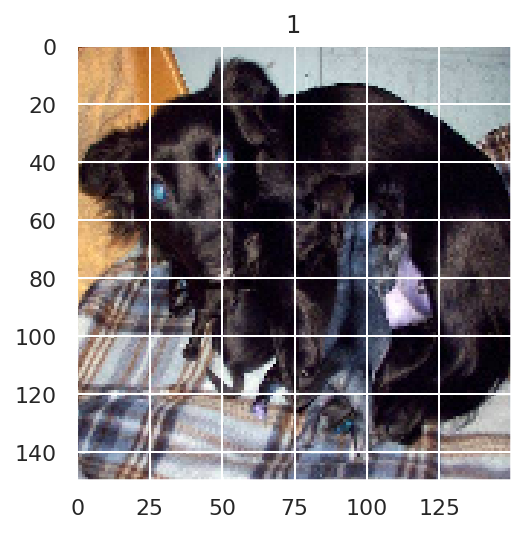

In [114]:
plt.title(train_labels[0])
plt.imshow(train_images[0])

In [115]:
test_images = []

for img in os.listdir(test_dir):
    try:
        img_r = cv2.imread(os.path.join(test_dir, img), cv2.IMREAD_COLOR)
        test_images.append(np.array(cv2.resize(img_r, (150, 150), interpolation=cv2.INTER_CUBIC)))
    except Exception as e:
        print('broken image')

broken image


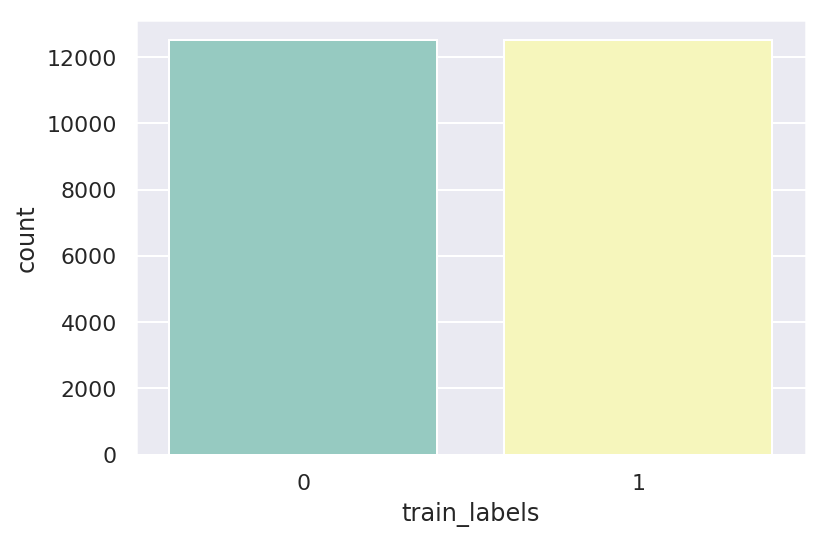

In [75]:
sns.set(style="darkgrid")
ax = sns.countplot(x="train_labels", data = train_df,palette="Set3")

We have 12000 cats and 12000 dogs to train with.

In [116]:
X_train, X_test, y_train, y_test = train_test_split(train_images, train_labels, test_size=0.2, random_state=13)

X_train = np.array(X_train)
X_test = np.array(X_test)
print("Train Shape:{}".format(X_train.shape))
print("Test Shape:{}".format(X_test.shape))

Train Shape:(20000, 150, 150, 3)
Test Shape:(5000, 150, 150, 3)


## Build Model

### The base CNN model

In [57]:
from keras.models import Sequential
from keras import layers
from keras.regularizers import l1
from keras import backend as K
from keras.layers import Dense, Activation, Dropout
from keras import optimizers

In [117]:
# Creating the convnet model
def build_cnn():
    model = Sequential()
    model.add(layers.Conv2D(32,(3,3),activation = 'relu', input_shape = (150,150,3)))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Conv2D(128,(3,3), activation = 'relu'))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Conv2D(128,(3,3), activation = 'relu'))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
 #   model.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes
    model.add(layers.Dense(1, activation='sigmoid'))
    return model

#### Fit the model

In [118]:
model_base = build_cnn()
model_base.name = 'base_cnn'
model_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 15, 15, 128)       147584    
__________

In [119]:
model_base.compile(loss = 'binary_crossentropy',
                   optimizer = optimizers.RMSprop(lr=1e-4),
                   metrics=['accuracy'])

In [120]:
X_train = X_train.reshape(-1, 150, 150, 3)
X_test = X_test.reshape(-1, 150, 150, 3)
history = model_base.fit(np.array(X_train), y_train, 
                         validation_data=(np.array(X_test), y_test), 
                         epochs = 30,
                         verbose=1)

Train on 20000 samples, validate on 5000 samples
Epoch 1/30
20000/20000 [==============================] - 14s 700us/step - loss: 8.0650 - acc: 0.4994 - val_loss: 7.9817 - val_acc: 0.5048
Epoch 2/30
20000/20000 [==============================] - 13s 659us/step - loss: 8.0784 - acc: 0.4988 - val_loss: 7.9817 - val_acc: 0.5048
Epoch 3/30
20000/20000 [==============================] - 13s 666us/step - loss: 8.0784 - acc: 0.4988 - val_loss: 7.9817 - val_acc: 0.5048
Epoch 4/30
20000/20000 [==============================] - 13s 663us/step - loss: 8.0784 - acc: 0.4988 - val_loss: 7.9817 - val_acc: 0.5048
Epoch 5/30
20000/20000 [==============================] - 13s 660us/step - loss: 8.0784 - acc: 0.4988 - val_loss: 7.9817 - val_acc: 0.5048
Epoch 6/30
20000/20000 [==============================] - 13s 663us/step - loss: 8.0784 - acc: 0.4988 - val_loss: 7.9817 - val_acc: 0.5048
Epoch 7/30
20000/20000 [==============================] - 13s 663us/step - loss: 8.0784 - acc: 0.4988 - val_loss: 7.9

In [121]:
model_base.save_weights('model_base_wieghts.h5')
model_base.save('model_base_keras.h5')

#### Performance

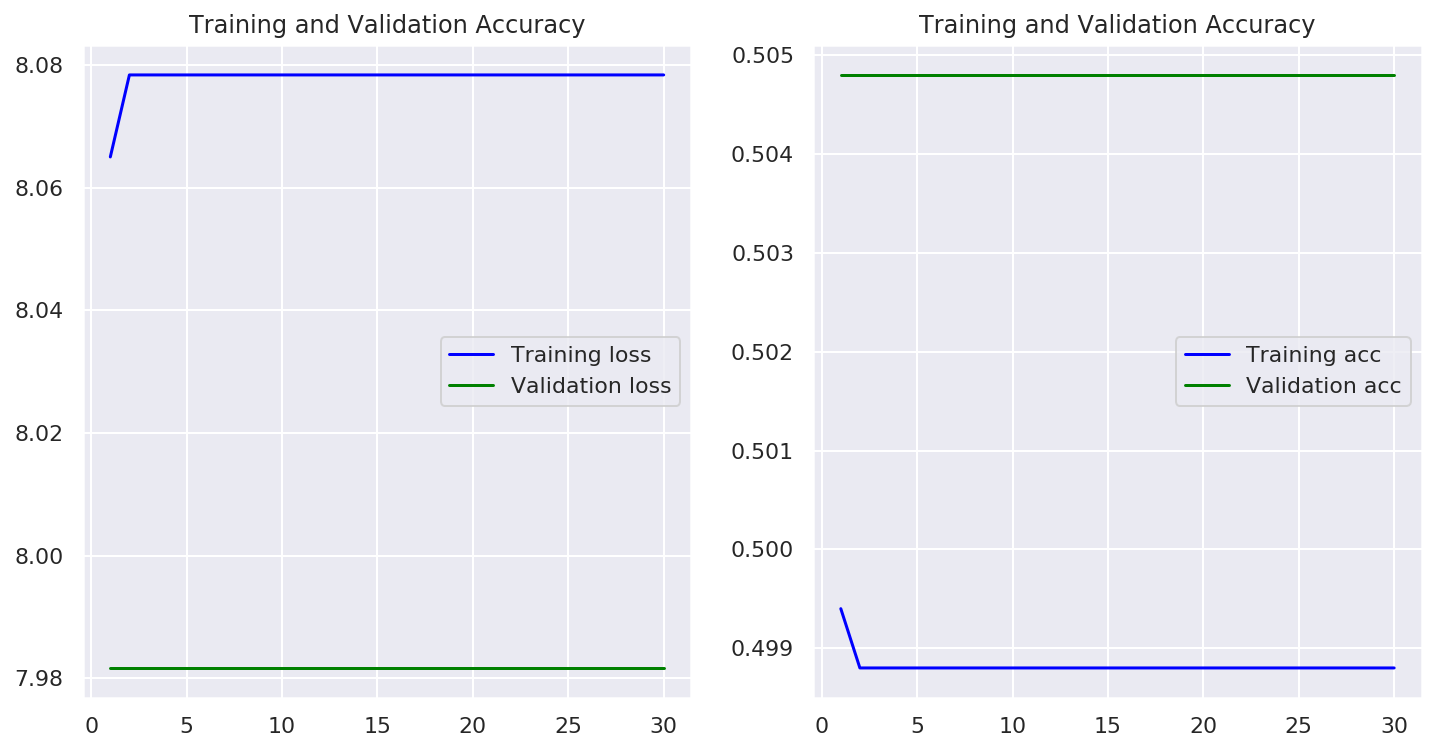

In [122]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12,6))
ax1.plot(epochs, loss,color='blue', label = 'Training loss')
ax1.plot(epochs, val_loss,color='green', label = 'Validation loss')
ax1.set_title('Training and Validation Accuracy')
ax1.legend()

ax2.plot(epochs, acc,  color='blue',label = 'Training acc')
ax2.plot(epochs, val_acc,color='green',label = 'Validation acc')
ax2.set_title('Training and Validation Accuracy')
ax2.legend()

plt.show()

Obvious overfitting charastics and can't acheive good accuracy score. The reason might be we have limited dataset even we already include data agumentation in the CNN model.

To solve that, we can use transfter learning to take advantages of featuers from imagenet.

* There are two ways of using a pre-trained network:
    1. Running the convolutional base over our dataset, recording its output to a Numpy array on disk and then using this data as an input to a standalone, densely connected classifier
    2. Extending the model by adding a top layer and then training model
* The first method is cheap in terms of computation since it doesnt require you to train the model from scratch. For the same reason we cannot take advantage of Data Augmentation
* The second method involves training the network from scratch. This will help us exploit image augmentation, but for the same reason it will be computationally expensive

### Train VGG16 without using pretrained parameters

In [192]:
from keras import models
from keras import layers

def model_vgg16_transfer2():

    model_transfer2 = models.Sequential()
    #model.add(ResNet50(include_top=False, pooling=POOLING))
    model_transfer2.add(VGG16(include_top=False, weights='imagenet',  input_shape=(150,150,3)))
    model_transfer2.add(layers.Flatten())
    model_transfer2.add(layers.Dense(256, activation = 'relu'))
    model_transfer2.add(layers.Dropout(0.5))
    model_transfer2.add(layers.Dense(1,activation = 'sigmoid'))
    model_transfer2.compile(loss='binary_crossentropy',
                            optimizer='adam',
                         #   optimizer=optimizers.RMSprop(lr=2e-5),
                            metrics=['acc'])

    return model_transfer2

In [193]:
model_transfer2 = model_vgg16_transfer2()
model_transfer2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_13 (Flatten)         (None, 8192)              0         
_________________________________________________________________
dense_39 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dropout_15 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_40 (Dense)             (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


Before we train the model its important to freeze the convolutional base which is vgg16 block.
Freezing the convolutional base preserves the representations learnt by it so that we dont need to train the model from scratch

In [194]:
print("The number of trainable weights pre freezing the convolutional layer", 
      len(model_transfer2.trainable_weights))

The number of trainable weights pre freezing the convolutional layer 30


In [ ]:
history2 = model_transfer2.fit(X_train, y_train, 
                              validation_data=(X_test, y_test), 
                              epochs = 20,
                              callbacks=callbacks,
                              verbose=1)

Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 84s 4ms/step - loss: 8.0660 - acc: 0.4991 - val_loss: 7.9817 - val_acc: 0.5048
Epoch 2/20
20000/20000 [==============================] - 84s 4ms/step - loss: 8.0988 - acc: 0.4971 - val_loss: 7.9817 - val_acc: 0.5048
Epoch 3/20
20000/20000 [==============================] - 84s 4ms/step - loss: 8.0629 - acc: 0.4993 - val_loss: 7.9817 - val_acc: 0.5048

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 4/20
13632/20000 [===================>..........] - ETA: 24s - loss: 8.1275 - acc: 0.4953

In [ ]:
model_transfer2.evaluate(X_test, y_test)

In [ ]:
acc = history2.history['acc']
val_acc = history2.history['val_acc']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(1, len(acc)+1)

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12,6))
ax1.plot(epochs, loss,color='blue', label = 'Training loss')
ax1.plot(epochs, val_loss,color='green', label = 'Validation loss')
ax1.set_title('Training and Validation Accuracy')
ax1.legend()

ax2.plot(epochs, acc,  color='blue',label = 'Training acc')
ax2.plot(epochs, val_acc,color='green',label = 'Validation acc')
ax2.set_title('Training and Validation Accuracy')
ax2.legend()

plt.show()

### Transfter Learning VGG16 Using Pre-trained Layers

The loaded model is chopped after last max-pool layer in VGG16 architecture by setting the parameter `include_top=false`.

In [148]:
# Defining and training the densely connected classifier

def model_transfer_vgg16():
    model = Sequential()   

    #model.add(ResNet50(include_top=False, pooling=POOLING))
    model.add(VGG16(include_top=False, weights='imagenet',  input_shape=(150,150,3)))
    
    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation = 'relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1,activation = 'sigmoid'))
    model.layers[0].trainable = False
    
    model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
                  loss='binary_crossentropy',
                  metrics=['acc'])

    return model

In [149]:
model_transfer = model_transfer_vgg16()

In [187]:
print("The number of trainable weights before freezing the convolutional layer = ",
      len(model_transfer.trainable_weights))

The number of trainable weights before freezing the convolutional layer =  4


In [164]:
model_transfer.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_9 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_23 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [150]:
# set callbacks
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience=10)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]

In [151]:
history = model_transfer.fit(X_train, y_train, 
                              validation_data=(X_test, y_test), 
                              epochs = 30,
                 #             callbacks=callbacks,
                              verbose=1)

Train on 20000 samples, validate on 5000 samples
Epoch 1/30
20000/20000 [==============================] - 35s 2ms/step - loss: 1.6316 - acc: 0.8638 - val_loss: 0.5895 - val_acc: 0.9452
Epoch 2/30
20000/20000 [==============================] - 34s 2ms/step - loss: 0.7357 - acc: 0.9358 - val_loss: 0.4972 - val_acc: 0.9536
Epoch 3/30
20000/20000 [==============================] - 34s 2ms/step - loss: 0.6471 - acc: 0.9446 - val_loss: 0.4584 - val_acc: 0.9572
Epoch 4/30
20000/20000 [==============================] - 34s 2ms/step - loss: 0.5312 - acc: 0.9521 - val_loss: 0.4320 - val_acc: 0.9600
Epoch 5/30
20000/20000 [==============================] - 34s 2ms/step - loss: 0.4547 - acc: 0.9585 - val_loss: 0.4126 - val_acc: 0.9610
Epoch 6/30
20000/20000 [==============================] - 34s 2ms/step - loss: 0.4368 - acc: 0.9601 - val_loss: 0.3863 - val_acc: 0.9612
Epoch 7/30
20000/20000 [==============================] - 34s 2ms/step - loss: 0.3625 - acc: 0.9647 - val_loss: 0.3679 - val_acc:

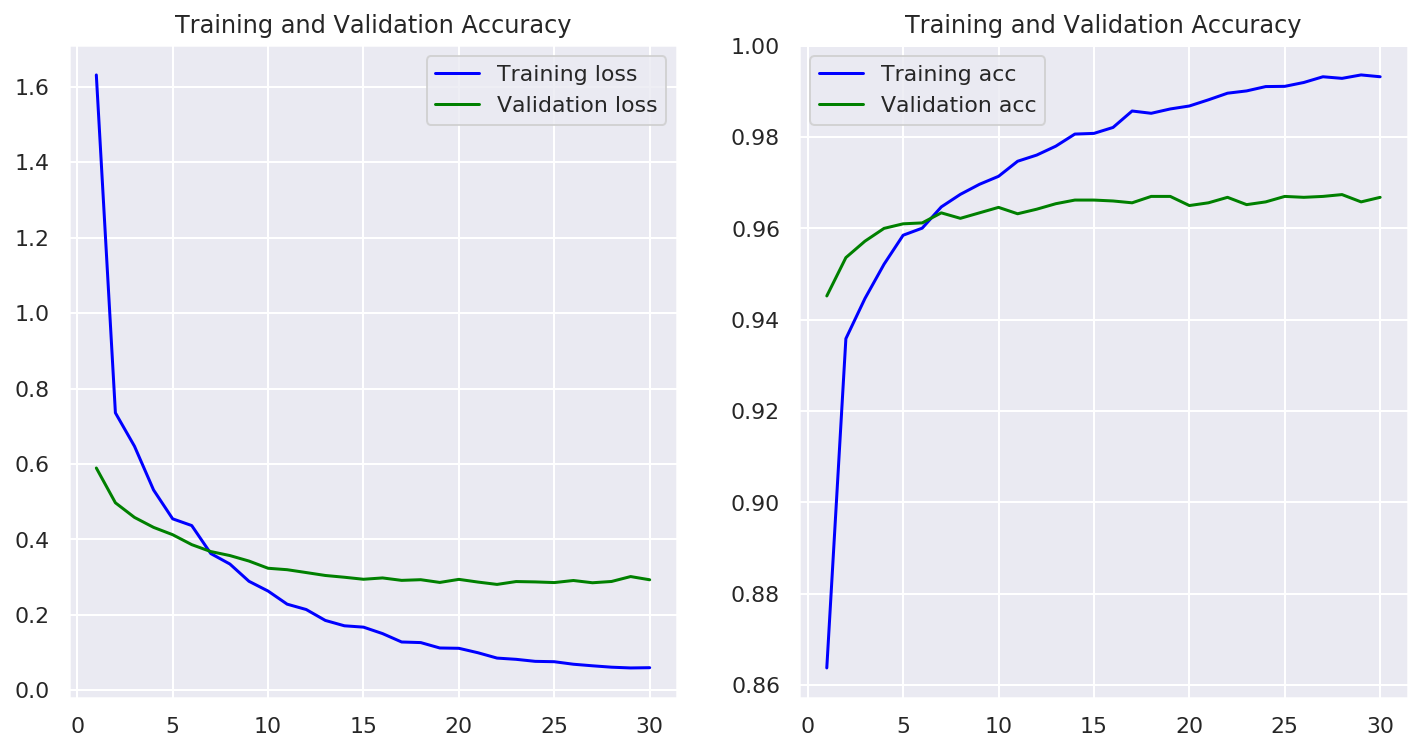

In [153]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12,6))
ax1.plot(epochs, loss,color='blue', label = 'Training loss')
ax1.plot(epochs, val_loss,color='green', label = 'Validation loss')
ax1.set_title('Training and Validation Accuracy')
ax1.legend()

ax2.plot(epochs, acc,  color='blue',label = 'Training acc')
ax2.plot(epochs, val_acc,color='green',label = 'Validation acc')
ax2.set_title('Training and Validation Accuracy')
ax2.legend()

plt.show()

## Test

For categoral classication the prediction will come with probability of each category. So we will pick the category that have the highest probability with numpy average max

We will convert the predict category back into our generator classes by using train_generator.class_indices. It is the classes that image generator map while converting data into computer vision

In [ ]:
predict = model_transfer2.predict_generator(test_generator, steps=(test_df.shape[0] // 20))

test_df['category'] = np.argmax(predict, axis=-1)
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)

From our prepare data part. We map data with `{1: 'dog', 0: 'cat'}`. Now we will map the result back to dog is 1 and cat is 0

In [ ]:
plt.imshow(test_images[0])


In [ ]:
test_images = np.array(test_images)
test_images = test_images.reshape(-1, 50, 50, 3)


In [ ]:
predictions = model_transfer2.predict(test_images)
counter = range(1, len(test_images) + 1)

results = pd.DataFrame({"id": counter, "label":list(predictions)})
cols = ['label']

for col in cols:
    results[col] = results[col].map(lambda x: str(x).lstrip('[').rstrip(']')).astype(float)

results.to_csv("dogsVScats.csv", index = False)